In [54]:
import pandas as pd
import matplotlib.pyplot as plt

load data and clear it

In [55]:
df = pd.read_csv("../data/output.csv")
df = df.drop("link", axis=1)
def transform(col: str) -> None:
    df[col] = df[col].fillna("")
    df[col] = df[col].apply(
        lambda x: x if isinstance(x, list) 
        else [item.strip() for item in x.split(",")]
    )
        
transform("tags")
transform("cities")

df.head(10)

,title,exp,company,salary,cities,tags
0,Python Developer,0-1,HOLYWATER,NaN,"[Київ, за кордоном, віддалено]","[Python, SQL, REST, API]"
1,Python Developer у Стартап,0-1,ESUPPORT,$1000–2500,[],"[Python, API, AI]"
2,Стажер Python Developer для УНКД,0-1,"ГО ""УНКД""",$300–500,[віддалено],"[Python, API]"
3,Junior Python розробник,0-1,Apriorit,NaN,"[Київ, Дніпро, віддалено]","[Python, Flask, Git, SQL, Docker, AWS, Kuberne..."
4,Middle Python Engineer (ML project),1-3,PlantIn,NaN,"[Київ, віддалено]","[Python, Git, SQL, API, Docker, AWS, AI, NoSQL..."
5,Middle Python developer,1-3,Exoft,NaN,[Львів],"[Python, Django, SQL, PostgreSQL, AI, JavaScri..."
6,Middle Python Engineer,1-3,Nova Digital,NaN,"[Київ, віддалено]","[Python, Git, Machine Learning, Pandas, NumPy]"
7,Middle Full-Stack Developer,1-3,"""ІНФОТЕХ""",NaN,[Київ],"[Python, Django, Git, REST, API, Docker, React..."
8,Middle Python Back-end Developer,1-3,Inquatro,$1600–2000,[віддалено],"[Python, Django, Flask, SQL, API, Docker, AWS,..."
9,Core Support Engineer,1-3,Temerix,NaN,"[Вінниця, віддалено]","[Python, Git, SQL, API, Docker, Linux, AI, Jav..."


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    133 non-null    object
 1   exp      133 non-null    object
 2   company  133 non-null    object
 3   salary   19 non-null     object
 4   cities   133 non-null    object
 5   tags     133 non-null    object
dtypes: object(6)
memory usage: 6.4+ KB


Top technologies in Python

In [57]:
from collections import Counter
all_tags = df['tags'].sum()
counter = Counter(all_tags)
top_20_tags = counter.most_common(20)
top_20_tags

[('Python', 130),
 ('AI', 107),
 ('API', 96),
 ('SQL', 85),
 ('Docker', 72),
 ('REST', 55),
 ('AWS', 51),
 ('Git', 50),
 ('Django', 46),
 ('Kubernetes', 41),
 ('PostgreSQL', 39),
 ('JS', 39),
 ('React', 35),
 ('Flask', 32),
 ('CI/CD', 30),
 ('OOP', 28),
 ('Linux', 28),
 ('NoSQL', 25),
 ('MongoDB', 24),
 ('Microservice', 23)]

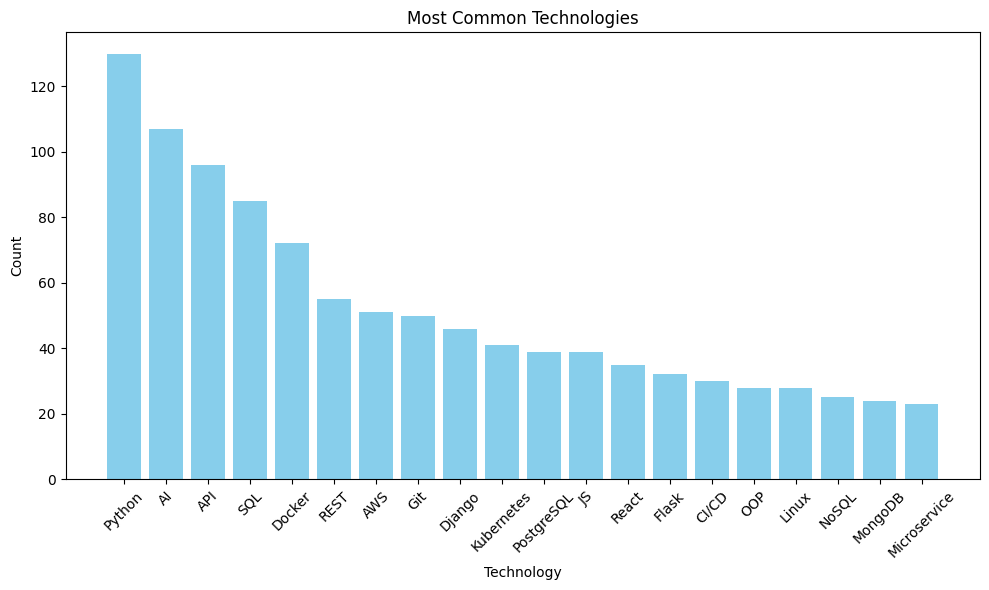

In [58]:
technologies, counts = zip(*top_20_tags)

plt.figure(figsize=(10, 6))
plt.bar(technologies, counts, color='skyblue')
plt.xlabel('Technology')
plt.ylabel('Count')
plt.title('Most Common Technologies')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("../data/charts/top_tech.png") 
plt.show()
plt.close()

Top cities employers

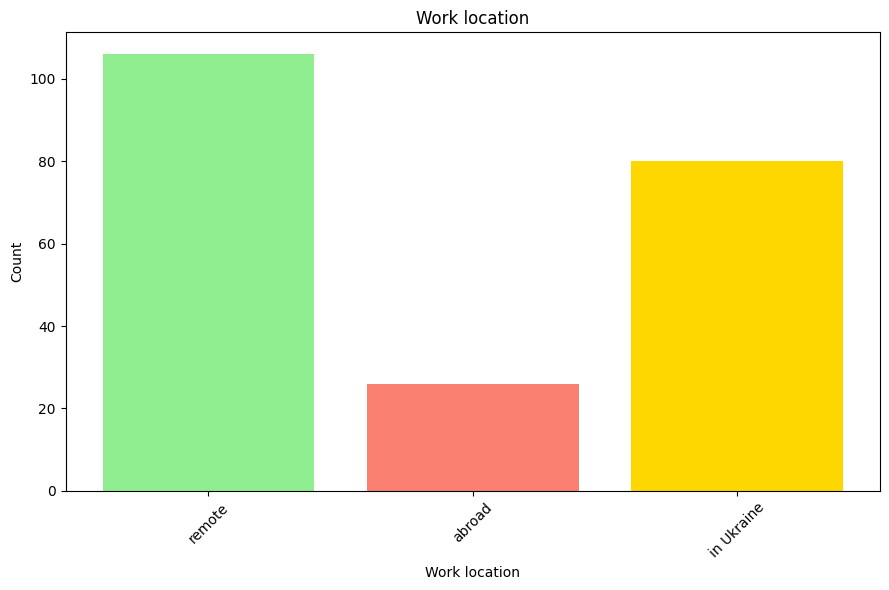

In [59]:
all_cities = df['cities'].sum()
city_counter = Counter(all_cities)
filtered_data = dict()
filtered_data["remote"] = city_counter["віддалено"]
foreign_cities = {key: count for key, count in city_counter.items() if "(" in key}
filtered_data["abroad"] = (city_counter["за кордоном"] 
                                + sum(foreign_cities.values()))
ukr_cities = {key: count 
            for key, count in city_counter.items()
            if len(key) > 0 and not "(" in key and "А" <= key[0] <= "Я"}
filtered_data["in Ukraine"] = sum(ukr_cities.values())
plt.figure(figsize=(9, 6))
colors = ['lightgreen', 'salmon', 'gold']
plt.bar(filtered_data.keys(), filtered_data.values(), color=colors)
plt.xlabel('Work location')
plt.ylabel('Count')
plt.title('Work location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../data/charts/work_location.png") 
plt.show()
plt.close()

Ukraine Top 5 cities by number of vacancies

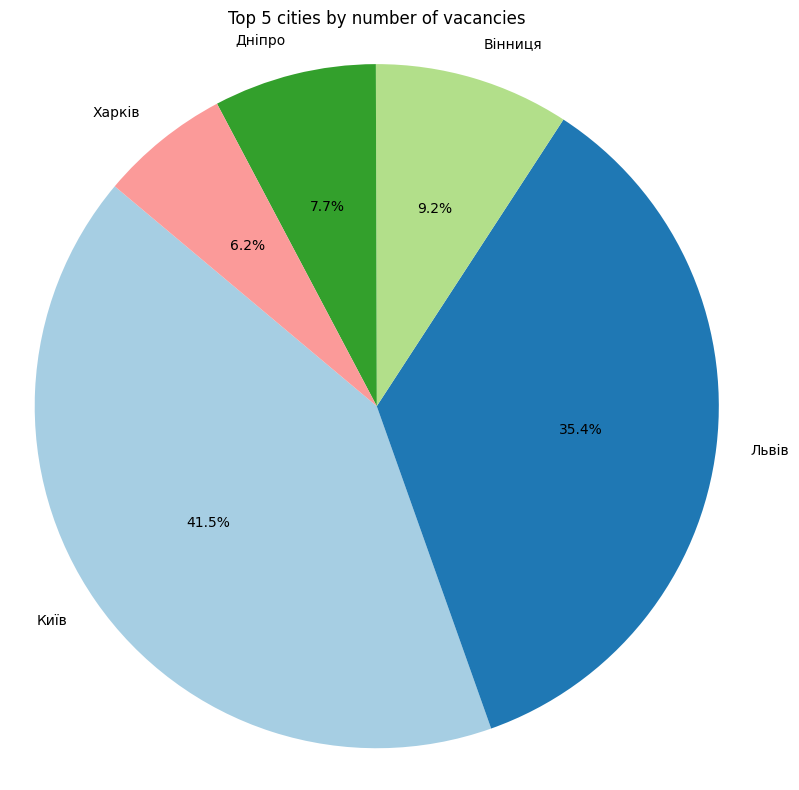

In [60]:
city_counter = Counter(ukr_cities)
top_5_cities = city_counter.most_common(5)
labels, sizes = zip(*top_5_cities)

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.axis('equal')

plt.title('Top 5 cities by number of vacancies')
plt.tight_layout()
plt.savefig("../data/charts/top_5_cities.png") 
plt.show()
plt.close()

analiz vs backend vs ai

In [67]:
data_analysis_tools = [
    "Pandas",
    "NumPy",
    "TensorFlow",
    "PyTorch",
    "Data Science",
    "Data Analysis",
    "Big Data",
    "ETL",
    "Machine Learning",
    "Deep Learning",
    "AWS"
]
backend_tools = [
    "Django",
    "Flask",
    "REST",
    "API",
    "Docker",
    "JavaScript",
    "JS",
    "React",
    "Fullstack",
    "Microservice",
    "HTML",
    "CSS",
    "DRF",
    "Asyncio",
    "GraphQL",
    "Kubernetes",
    "CI/CD",
    "Jenkins",
    "Ansible",
    "Bootstrap",
    "Tailwind",
    "Vue",
    "Angular",
    "TypeScript"
]

ai_tools = [
    "AI",
    "Artificial Intelligence",
    "TensorFlow",
    "PyTorch",
    "Machine Learning",
    "Deep Learning"
]

def check_data_analysis_tools(tags):
    return any(tag in data_analysis_tools for tag in tags)

def check_backend_tools(tags):
    return any(tag in backend_tools for tag in tags)

def check_ai_tools(tags):
    return any(tag in ai_tools for tag in tags)

df_pl = df
df_pl["analysis"] = df_pl["tags"].apply(check_data_analysis_tools)
df_pl["backend"] = df_pl["tags"].apply(check_backend_tools)
df_pl["ai"] = df_pl["tags"].apply(check_ai_tools)
df_pl.head(5)

,title,exp,company,salary,cities,tags,analysis,backend,ai
0,Python Developer,0-1,HOLYWATER,NaN,"[Київ, за кордоном, віддалено]","[Python, SQL, REST, API]",False,True,False
1,Python Developer у Стартап,0-1,ESUPPORT,$1000–2500,[],"[Python, API, AI]",False,True,True
2,Стажер Python Developer для УНКД,0-1,"ГО ""УНКД""",$300–500,[віддалено],"[Python, API]",False,True,False
3,Junior Python розробник,0-1,Apriorit,NaN,"[Київ, Дніпро, віддалено]","[Python, Flask, Git, SQL, Docker, AWS, Kuberne...",True,True,False
4,Middle Python Engineer (ML project),1-3,PlantIn,NaN,"[Київ, віддалено]","[Python, Git, SQL, API, Docker, AWS, AI, NoSQL...",True,True,True


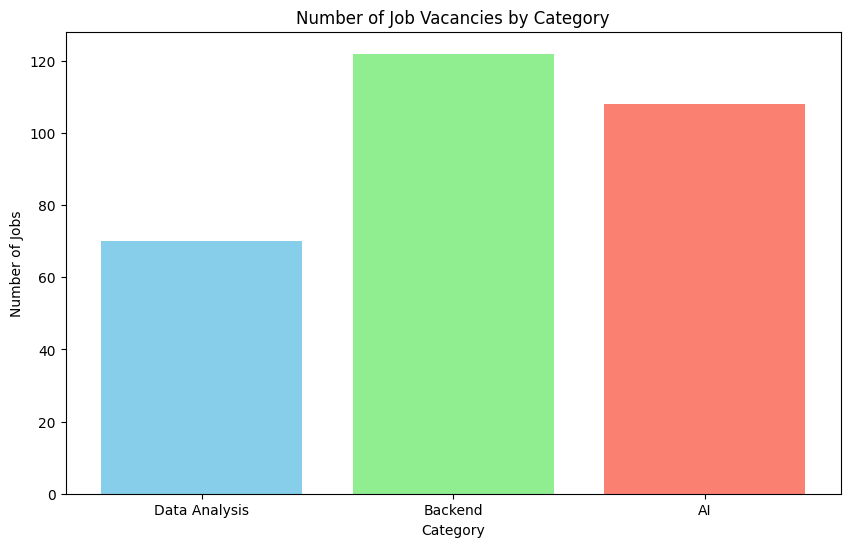

In [69]:
categories = ['Data Analysis', 'Backend', 'AI']
counts = [
    df["analysis"].sum(),
    df["backend"].sum(),
    df["ai"].sum()
]

plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Category')
plt.ylabel('Number of Jobs')
plt.title('Number of Job Vacancies by Category')
plt.savefig("../data/charts/vacation_category.png") 
plt.show()
plt.close()

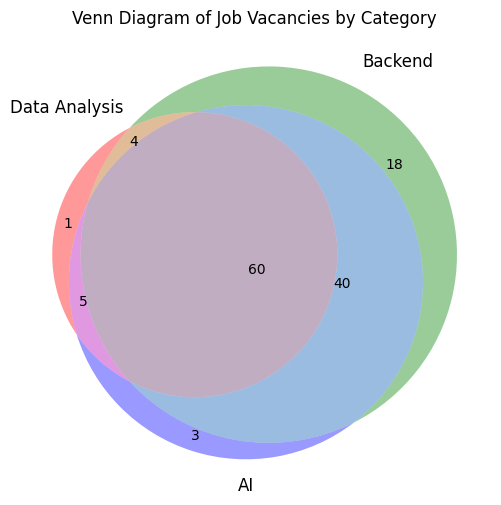

In [70]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

only_analysis = df['analysis'].sum() - (df['analysis'] & df['backend']).sum() - (df['analysis'] & df['ai']).sum() + (df['analysis'] & df['backend'] & df['ai']).sum()
only_backend = df['backend'].sum() - (df['backend'] & df['analysis']).sum() - (df['backend'] & df['ai']).sum() + (df['analysis'] & df['backend'] & df['ai']).sum()
only_ai = df['ai'].sum() - (df['ai'] & df['analysis']).sum() - (df['ai'] & df['backend']).sum() + (df['analysis'] & df['backend'] & df['ai']).sum()

data_backend = (df['analysis'] & df['backend']).sum() - (df['analysis'] & df['backend'] & df['ai']).sum()
data_ai = (df['analysis'] & df['ai']).sum() - (df['analysis'] & df['backend'] & df['ai']).sum()
backend_ai = (df['backend'] & df['ai']).sum() - (df['analysis'] & df['backend'] & df['ai']).sum()

all_three = (df['analysis'] & df['backend'] & df['ai']).sum()

venn_data = {
    '100': max(only_analysis, 0),
    '010': max(only_backend, 0),
    '001': max(only_ai, 0),
    '110': max(data_backend, 0),
    '101': max(data_ai, 0),
    '011': max(backend_ai, 0),
    '111': max(all_three, 0)
}

plt.figure(figsize=(10, 6))
venn = venn3(subsets=venn_data, set_labels=('Data Analysis', 'Backend', 'AI'))
plt.title('Venn Diagram of Job Vacancies by Category')
plt.savefig("../data/charts/venn_diagram.png") 
plt.show()
plt.close()

experience

In [72]:
counts = [
    df[df["exp"] == "0-1"]["exp"].count(),
    df[df["exp"] == "1-3"]["exp"].count(),
    df[df["exp"] == "3-5"]["exp"].count(),
    df[df["exp"] == "5plus"]["exp"].count(),
    ]
labels = ["less 1 year", "1-3 years", "3-5 years", "more 5 years"]


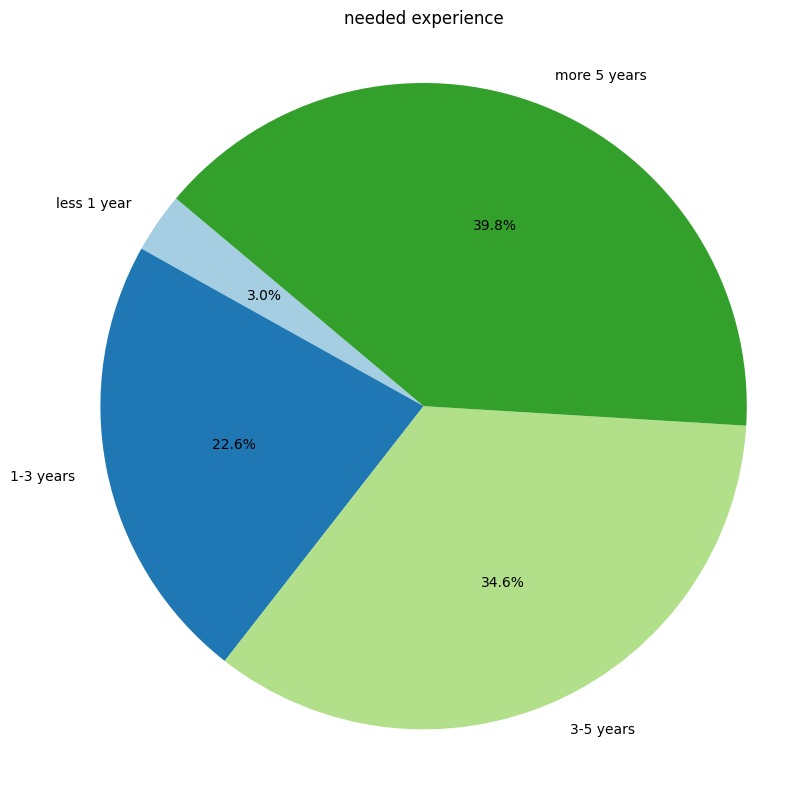

In [73]:
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.axis('equal')

plt.title('needed experience')
plt.tight_layout()
plt.savefig("../data/charts/experience.png") 
plt.show()
plt.close()

experience and category

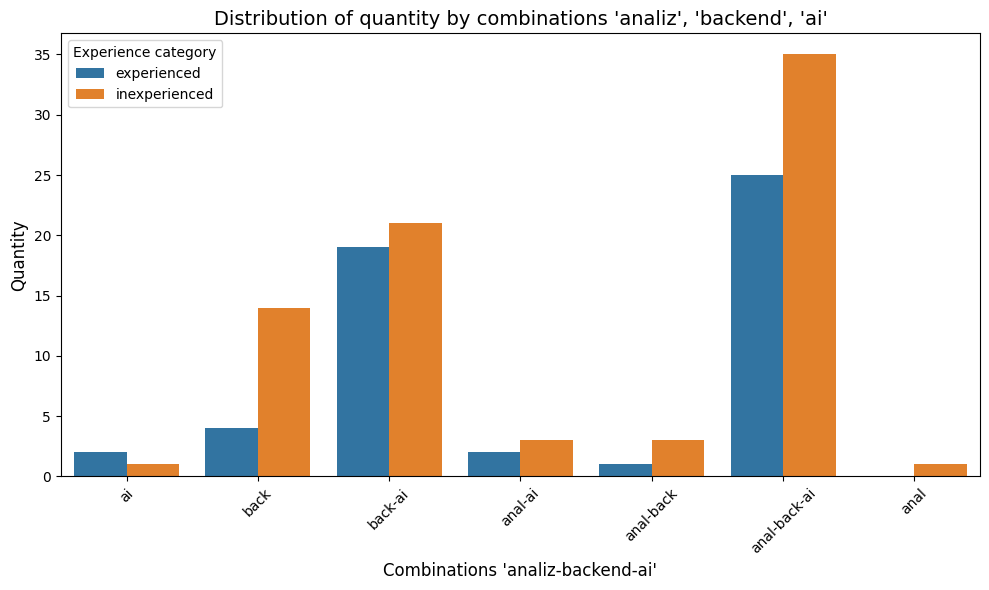

In [74]:
import seaborn as sns

def create_combination(row):
    parts = []
    if row["analysis"]:
        parts.append("anal")
    if row["backend"]:
        parts.append("back")
    if row["ai"]:
        parts.append("ai")
    return "-".join(parts) if parts else None

df_exp = df[["exp", "analysis", "backend", "ai"]].copy()
df_exp["experience_category"] = df_pl["exp"].apply(
    lambda x: "inexperienced" if x in ["0-1", "1-3","3-5"] else "experienced"
)
df_exp.head(5)
grouped = (
    df_exp.groupby(
        ["experience_category", "analysis", "backend", "ai"]
    )
    .size()
    .reset_index(name="count")
)

grouped["combination"] = grouped.apply(create_combination, axis=1)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped,
    x="combination",
    y="count",
    hue="experience_category",
    palette=["#1f77b4", "#ff7f0e"]
)

plt.title(
    "Distribution of quantity by combinations 'analiz', 'backend', 'ai'",
    fontsize=14
)
plt.xlabel("Combinations 'analiz-backend-ai'", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.legend(title="Experience category")
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("../data/charts/experience_type_relation.png") 
plt.show()
plt.close()